In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [55]:
from copy import deepcopy as dc

def prepare_shifted_df(df, n_steps, input_name):
    df = dc(df)
    
    # df.set_index('Month', inplace=True)
    
    for i in reversed(range(1, n_steps + 1)):
        new_name = input_name + f"(t-{i})"
        df[new_name] = df.iloc[:,0].shift(i)
        
    df.dropna(inplace=True)
    
    return df.iloc[:,1:]

lookback = 3

In [56]:
df = pd.read_csv('../Employment_pch_1960.csv')
df = df.iloc[:-1,1:]
df.set_index('Month', inplace=True)
print(df)

shifted_df0 = prepare_shifted_df(df[['Total_private_pch']], lookback, 'Total_private_pch')
shifted_df0
# shifted_df0 = np.flip(shifted_df0, axis=1)

            Total_private_pch  Construction_pch
Month                                          
1960-01-01            0.35148          -1.20994
1960-02-01            0.47860           1.05925
1960-03-01           -0.55860          -5.63380
1960-04-01            0.76205           4.26935
1960-05-01           -0.50995           0.56591
...                       ...               ...
2023-05-01            0.19161           0.31642
2023-06-01            0.06450           0.36588
2023-07-01            0.10867           0.15085
2023-08-01            0.08535           0.37655
2023-09-01            0.18401           0.16256

[765 rows x 2 columns]


,Total_private_pch(t-3),Total_private_pch(t-2),Total_private_pch(t-1)
Month,,,
1960-04-01,0.35148,0.47860,-0.55860
1960-05-01,0.47860,-0.55860,0.76205
1960-06-01,-0.55860,0.76205,-0.50995
1960-07-01,0.76205,-0.50995,-0.27583
1960-08-01,-0.50995,-0.27583,-0.11325
...,...,...,...
2023-05-01,0.14560,0.11827,0.13468
2023-06-01,0.11827,0.13468,0.19161
2023-07-01,0.13468,0.19161,0.06450


In [57]:
df = pd.read_csv('../Input_features_1960.csv')
df = df.iloc[:,1:]
df.set_index('Month', inplace=True)
print(df)

shifted_df1 = prepare_shifted_df(df[['Fedfund_rate']], lookback, 'Fedfund_rate')
shifted_df1

            Fedfund_rate   GDP_pch  CPI_pc1  Loan_pch  House_ch
Month                                                          
1960-01-01          3.99  2.657590  1.24095      10.2    -197.0
1960-02-01          3.97  1.675410  1.41379      10.1    -164.0
1960-03-01          3.84  0.693230  1.51881       6.7    -511.0
1960-04-01          3.92 -0.288950  1.93237       6.6    -301.0
1960-05-01          3.85  0.086070  1.82507       3.3    -227.0
...                  ...       ...      ...       ...       ...
2023-05-01          5.06  1.310517  4.12884       6.0      40.0
2023-06-01          5.08  1.690863  3.09200       3.0    -143.0
2023-07-01          5.12  2.071210  3.29908       2.4      80.0
2023-08-01          5.33  2.071210  3.70750       6.3    -200.0
2023-09-01          5.33  2.071210  3.68990       4.4    -117.0

[765 rows x 5 columns]


,Fedfund_rate(t-3),Fedfund_rate(t-2),Fedfund_rate(t-1)
Month,,,
1960-04-01,3.99,3.97,3.84
1960-05-01,3.97,3.84,3.92
1960-06-01,3.84,3.92,3.85
1960-07-01,3.92,3.85,3.32
1960-08-01,3.85,3.32,3.23
...,...,...,...
2023-05-01,4.57,4.65,4.83
2023-06-01,4.65,4.83,5.06
2023-07-01,4.83,5.06,5.08


In [58]:
shifted_df2 = prepare_shifted_df(df[['GDP_pch']], lookback, 'GDP_pch')
shifted_df2

,GDP_pch(t-3),GDP_pch(t-2),GDP_pch(t-1)
Month,,,
1960-04-01,2.657590,1.675410,0.693230
1960-05-01,1.675410,0.693230,-0.288950
1960-06-01,0.693230,-0.288950,0.086070
1960-07-01,-0.288950,0.086070,0.461090
1960-08-01,0.086070,0.461090,0.836110
...,...,...,...
2023-05-01,1.332950,1.131560,0.930170
2023-06-01,1.131560,0.930170,1.310517
2023-07-01,0.930170,1.310517,1.690863


In [59]:
shifted_df3 = prepare_shifted_df(df[['CPI_pc1']], lookback, 'CPI_pc1')
shifted_df4 = prepare_shifted_df(df[['Loan_pch']], lookback, 'Loan_pch')
shifted_df5 = prepare_shifted_df(df[['House_ch']], lookback, 'House_ch')
# print(type(shifted_df5))

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

def scale_df(df, scaler):
    df_np = df.to_numpy()
    return scaler.fit_transform(df_np)



X shape is (762, 3, 6)


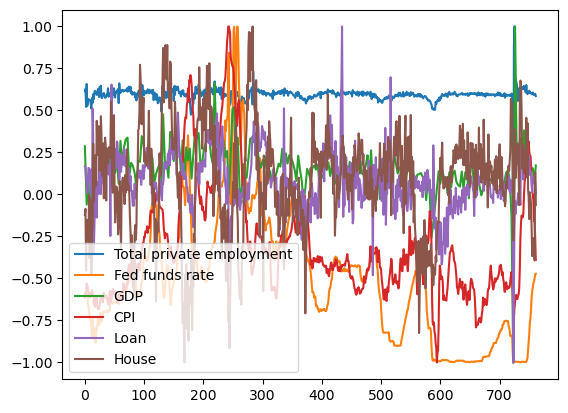

array([False, False, False, False, False, False])

In [61]:
X0 = scale_df(shifted_df0, scaler)
X1 = scale_df(shifted_df1, scaler)
X2= scale_df(shifted_df2, scaler)
X3 = scale_df(shifted_df3, scaler)
X4 = scale_df(shifted_df4, scaler)
X5 = scale_df(shifted_df5, scaler)

temp_list = [X0, X1, X2, X3, X4, X5]
# print(X0)
# print(type(X0.shape[0]))
X = np.zeros([X0.shape[0], X0.shape[1], 6])
# X.shape
for i in range(6):
    X[:,:,i] = temp_list[i]

print(f"X shape is {X.shape}")
# plt.plot(X[:,:,0])
plt.plot(X0[:,0], label = 'Total private employment')
plt.plot(X1[:,0], label = 'Fed funds rate')
plt.plot(X2[:,0], label = 'GDP')
plt.plot(X3[:,0], label = 'CPI')
plt.plot(X4[:,0], label = 'Loan')
plt.plot(X5[:,0], label = 'House')

plt.legend()
plt.show()

np.isnan(X).any(0).any(0)




In [62]:
# shifted0_np = shifted_df0.to_numpy()
# shifted1_np = shifted_df1.to_numpy()
# shifted2_np = shifted_df2.to_numpy()
# # shifted1_np.shape

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))

# X0 = scaler.fit_transform(shifted0_np)
# X1 = scaler.fit_transform(shifted1_np)
# X2 = scaler.fit_transform(shifted2_np)
# print(X0.shape)
# print(X1.shape)
# assert((X1.shape == X2.shape) & (X1.shape == X0.shape))
# print(f"X1 shape is {X1.shape}")
# # print(X1)
# # X = [X0, X1, X2]
# X = np.zeros([X1.shape[0], X1.shape[1], 3])

# X[:,:,0] = X0
# X[:,:,1] = X1
# X[:,:,2] = X2
